# A. <ins>Data Collection :</ins>
### First step for prediction system is data collection and deciding about the training and testing dataset. In this project we have used 80% training dataset and 20% dataset used as testing dataset the for the system.



# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [2]:
df=pd.read_csv('./heart disease dataset/processed.cleveland.csv',header = None,na_values=["?","??","????"])

In [3]:
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

# B. <ins>Attribute Selection :</ins>
### Attribute of dataset are property of dataset which are used for the system and, for heart many attributes are like heart bit rate of person, gender of the person, age of the person, chest pain, peak exercise ST segment (slope) and many more.
### In the actual Cleveland Heart Disease dataset it contains 76 attributes, but all published experiments refer to using a subset of 14 of them. Therefore, for this project a processed dataset is used which is also available in the UCI Machine Learning Repository site and it contains the 14 attributes used in this project.
### The informations regarding all the attributes are shown below


In [4]:
#Assigning feature names
df.columns =['age','sex','Cp','trtbps','chol','fbs','Restecg','thalachh','Exng','Oldpeak','Slp','Caa','Thall','Output']

In [5]:
df.head()

age  sex   Cp  trtbps   chol  fbs  Restecg  thalachh  Exng  Oldpeak  Slp  \
0  63.0  1.0  1.0   145.0  233.0  1.0      2.0     150.0   0.0      2.3  3.0   
1  67.0  1.0  4.0   160.0  286.0  0.0      2.0     108.0   1.0      1.5  2.0   
2  67.0  1.0  4.0   120.0  229.0  0.0      2.0     129.0   1.0      2.6  2.0   
3  37.0  1.0  3.0   130.0  250.0  0.0      0.0     187.0   0.0      3.5  3.0   
4  41.0  0.0  2.0   130.0  204.0  0.0      2.0     172.0   0.0      1.4  1.0   

   Caa  Thall  Output  
0  0.0    6.0       0  
1  3.0    3.0       2  
2  2.0    7.0       1  
3  0.0    3.0       0  
4  0.0    3.0       0

# C. <ins>Data Preprocessing :</ins>
### Preprocessing of data needed for achieving prestigious result from the machine learning algorithms. For example, some ML algorithm does not support missing values for this we have to manage null values from original raw data. Also for the project  some categorized values are coverted to dummy value in the form of “0”and “1”

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   Exng      303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slp       303 non-null    float64
 11  Caa       299 non-null    float64
 12  Thall     301 non-null    float64
 13  Output    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
#Attribute information
df.describe()

age         sex          Cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          Restecg    thalachh        Exng     Oldpeak         Slp         Caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

            Thall      Output  
count  301.000000  303.000000  
mean     4.734219    0.937294  
std      1.939706    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [9]:
#Checking For Missing Values
df.isnull()

age    sex     Cp  trtbps   chol    fbs  Restecg  thalachh   Exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     Oldpeak    Slp    Caa  Thall  Output  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False   True  False   False  

[303 rows x 14 columns]

In [10]:
df.isnull().sum()

age         0
sex         0
Cp          0
trtbps      0
chol        0
fbs         0
Restecg     0
thalachh    0
Exng        0
Oldpeak     0
Slp         0
Caa         4
Thall       2
Output      0
dtype: int64

In [11]:
#Checking for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
#Making a copy of original dataset with deep copy for data preprocessing
df_copy = df.copy(deep = True)
df_copy

age  sex   Cp  trtbps   chol  fbs  Restecg  thalachh  Exng  Oldpeak  \
0    63.0  1.0  1.0   145.0  233.0  1.0      2.0     150.0   0.0      2.3   
1    67.0  1.0  4.0   160.0  286.0  0.0      2.0     108.0   1.0      1.5   
2    67.0  1.0  4.0   120.0  229.0  0.0      2.0     129.0   1.0      2.6   
3    37.0  1.0  3.0   130.0  250.0  0.0      0.0     187.0   0.0      3.5   
4    41.0  0.0  2.0   130.0  204.0  0.0      2.0     172.0   0.0      1.4   
..    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
298  45.0  1.0  1.0   110.0  264.0  0.0      0.0     132.0   0.0      1.2   
299  68.0  1.0  4.0   144.0  193.0  1.0      0.0     141.0   0.0      3.4   
300  57.0  1.0  4.0   130.0  131.0  0.0      0.0     115.0   1.0      1.2   
301  57.0  0.0  2.0   130.0  236.0  0.0      2.0     174.0   0.0      0.0   
302  38.0  1.0  3.0   138.0  175.0  0.0      0.0     173.0   0.0      0.0   

     Slp  Caa  Thall  Output  
0    3.0  0.0    6.0       0  
1    2.0  3.0    3.0       2  
2    2.0  2.0    7.0       1  
3    3.0  0.0    3.0       0  
4    1.0  0.0    3.0       0  
..   ...  ...    ...     ...  
298  2.0  0.0    7.0       1  
299  2.0  2.0    7.0       2  
300  2.0  1.0    7.0       3  
301  2.0  1.0    3.0       1  
302  1.0  NaN    3.0       0  

[303 rows x 14 columns]

In [14]:
#Checking number of unique values for each attribute
df_copy.nunique()

age          41
sex           2
Cp            4
trtbps       50
chol        152
fbs           2
Restecg       3
thalachh     91
Exng          2
Oldpeak      40
Slp           3
Caa           4
Thall         3
Output        5
dtype: int64

In [15]:
df_copy.dtypes

age         float64
sex         float64
Cp          float64
trtbps      float64
chol        float64
fbs         float64
Restecg     float64
thalachh    float64
Exng        float64
Oldpeak     float64
Slp         float64
Caa         float64
Thall       float64
Output        int64
dtype: object

In [16]:
df_copy['sex'] = df_copy['sex'].astype('int64')
df_copy.dtypes

age         float64
sex           int64
Cp          float64
trtbps      float64
chol        float64
fbs         float64
Restecg     float64
thalachh    float64
Exng        float64
Oldpeak     float64
Slp         float64
Caa         float64
Thall       float64
Output        int64
dtype: object

In [17]:
df_copy.isna()

age    sex     Cp  trtbps   chol    fbs  Restecg  thalachh   Exng  \
0    False  False  False   False  False  False    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False  False    False     False  False   
301  False  False  False   False  False  False    False     False  False   
302  False  False  False   False  False  False    False     False  False   

     Oldpeak    Slp    Caa  Thall  Output  
0      False  False  False  False   False  
1      False  False  False  False   False  
2      False  False  False  False   False  
3      False  False  False  False   False  
4      False  False  False  False   False  
..       ...    ...    ...    ...     ...  
298    False  False  False  False   False  
299    False  False  False  False   False  
300    False  False  False  False   False  
301    False  False  False  False   False  
302    False  False   True  False   False  

[303 rows x 14 columns]

In [18]:
df_copy.isna().sum()

age         0
sex         0
Cp          0
trtbps      0
chol        0
fbs         0
Restecg     0
thalachh    0
Exng        0
Oldpeak     0
Slp         0
Caa         4
Thall       2
Output      0
dtype: int64

In [19]:
df_copy['Output'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [20]:
df_copy.Output.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: Output, dtype: int64

In [21]:
#Data encoding and dealing with missing values
df_copy['Output'] = df_copy.Output.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df_copy['sex'] = df_copy.sex.map({0: 'female', 1: 'male'})
df_copy['Thall'] = df_copy.Thall.fillna(df_copy.Thall.mean())
df_copy['Caa'] = df_copy.Caa.fillna(df_copy.Caa.mean())

In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   Cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   Exng      303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slp       303 non-null    float64
 11  Caa       303 non-null    float64
 12  Thall     303 non-null    float64
 13  Output    303 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 33.3+ KB


In [23]:
#Attribute information after cleaning of data
df_copy.describe()

age          Cp      trtbps        chol         fbs     Restecg  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    3.158416  131.689769  246.693069    0.148515    0.990099   
std      9.038662    0.960126   17.599748   51.776918    0.356198    0.994971   
min     29.000000    1.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.000000    3.000000  120.000000  211.000000    0.000000    0.000000   
50%     56.000000    3.000000  130.000000  241.000000    0.000000    1.000000   
75%     61.000000    4.000000  140.000000  275.000000    0.000000    2.000000   
max     77.000000    4.000000  200.000000  564.000000    1.000000    2.000000   

         thalachh        Exng     Oldpeak         Slp         Caa       Thall  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   149.607261    0.326733    1.039604    1.600660    0.672241    4.734219   
std     22.875003    0.469794    1.161075    0.616226    0.931209    1.933272   
min     71.000000    0.000000    0.000000    1.000000    0.000000    3.000000   
25%    133.500000    0.000000    0.000000    1.000000    0.000000    3.000000   
50%    153.000000    0.000000    0.800000    2.000000    0.000000    3.000000   
75%    166.000000    1.000000    1.600000    2.000000    1.000000    7.000000   
max    202.000000    1.000000    6.200000    3.000000    3.000000    7.000000   

           Output  
count  303.000000  
mean     0.458746  
std      0.499120  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [24]:
#Checking for null values after data cleaning
df_copy.isnull().sum()

age         0
sex         0
Cp          0
trtbps      0
chol        0
fbs         0
Restecg     0
thalachh    0
Exng        0
Oldpeak     0
Slp         0
Caa         0
Thall       0
Output      0
dtype: int64

In [25]:
df_copy.Output.value_counts()

0    164
1    139
Name: Output, dtype: int64

# D. <ins>Data Visualization :</ins>
### Data viewing is a data analysis field related to visual representation of data. It organizes data clearly and is an effective way of imagining communication from data. We use data view, we can get a visual summary of our data. With pictures, maps and graphs, the human mind has an easy time to process and understand any given data. 
### Matplotlib and Seaborn are python libraries which are used for data visualization

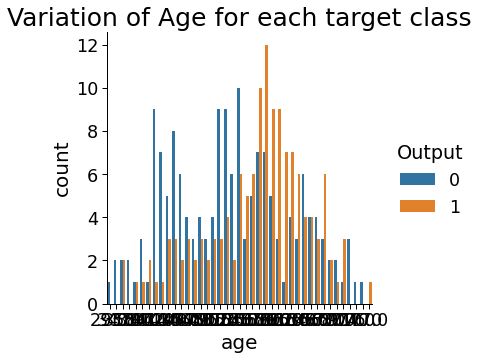

In [26]:
# Plot for distribution of target v/s age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 18,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df_copy, x = 'age', hue = 'Output', order = df_copy['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

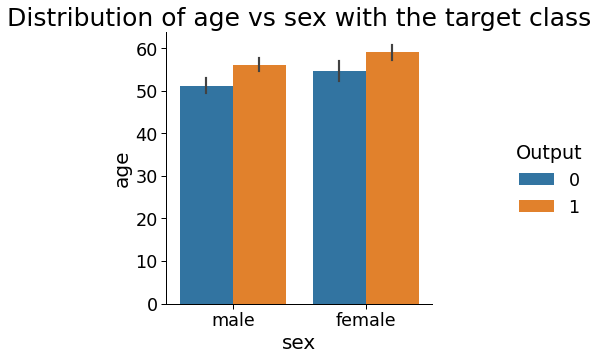

In [27]:
# Barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df_copy, y = 'age', x = 'sex', hue = 'Output')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [28]:
df_copy['sex'] = df_copy.sex.map({'female' : 0,'male' : 1})

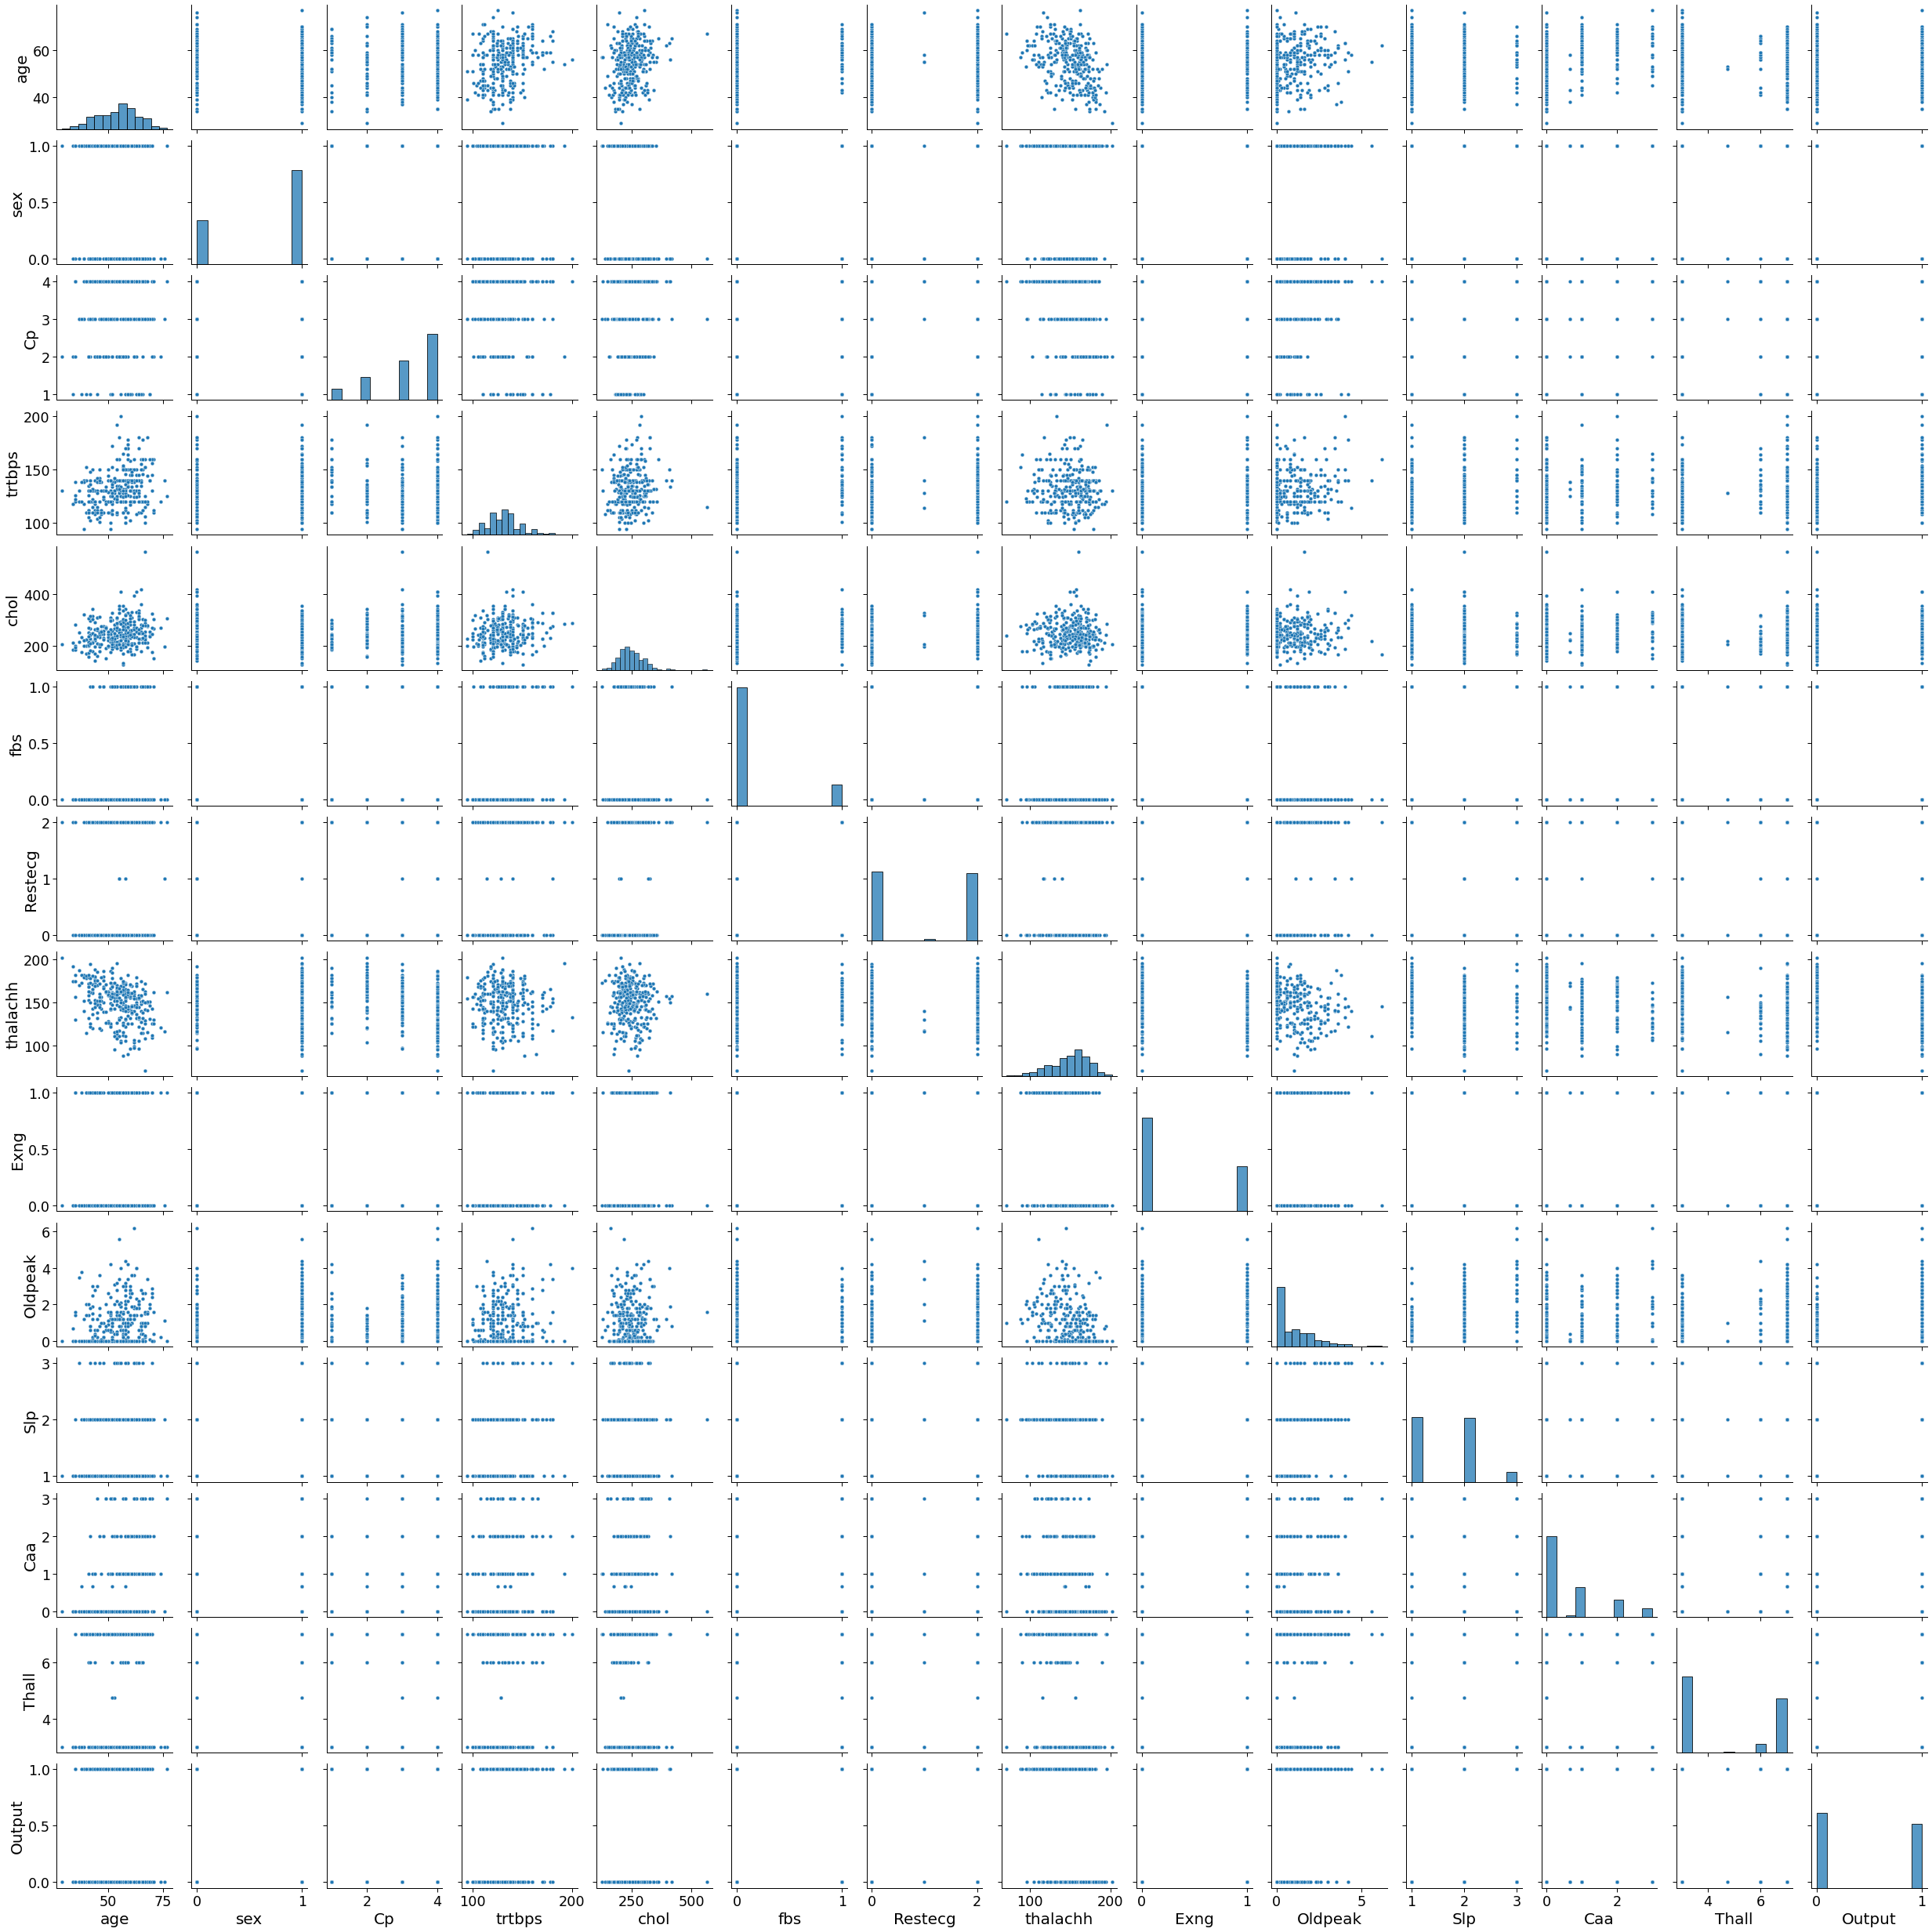

In [29]:
#Pairplot for every features
sns.pairplot(df_copy)

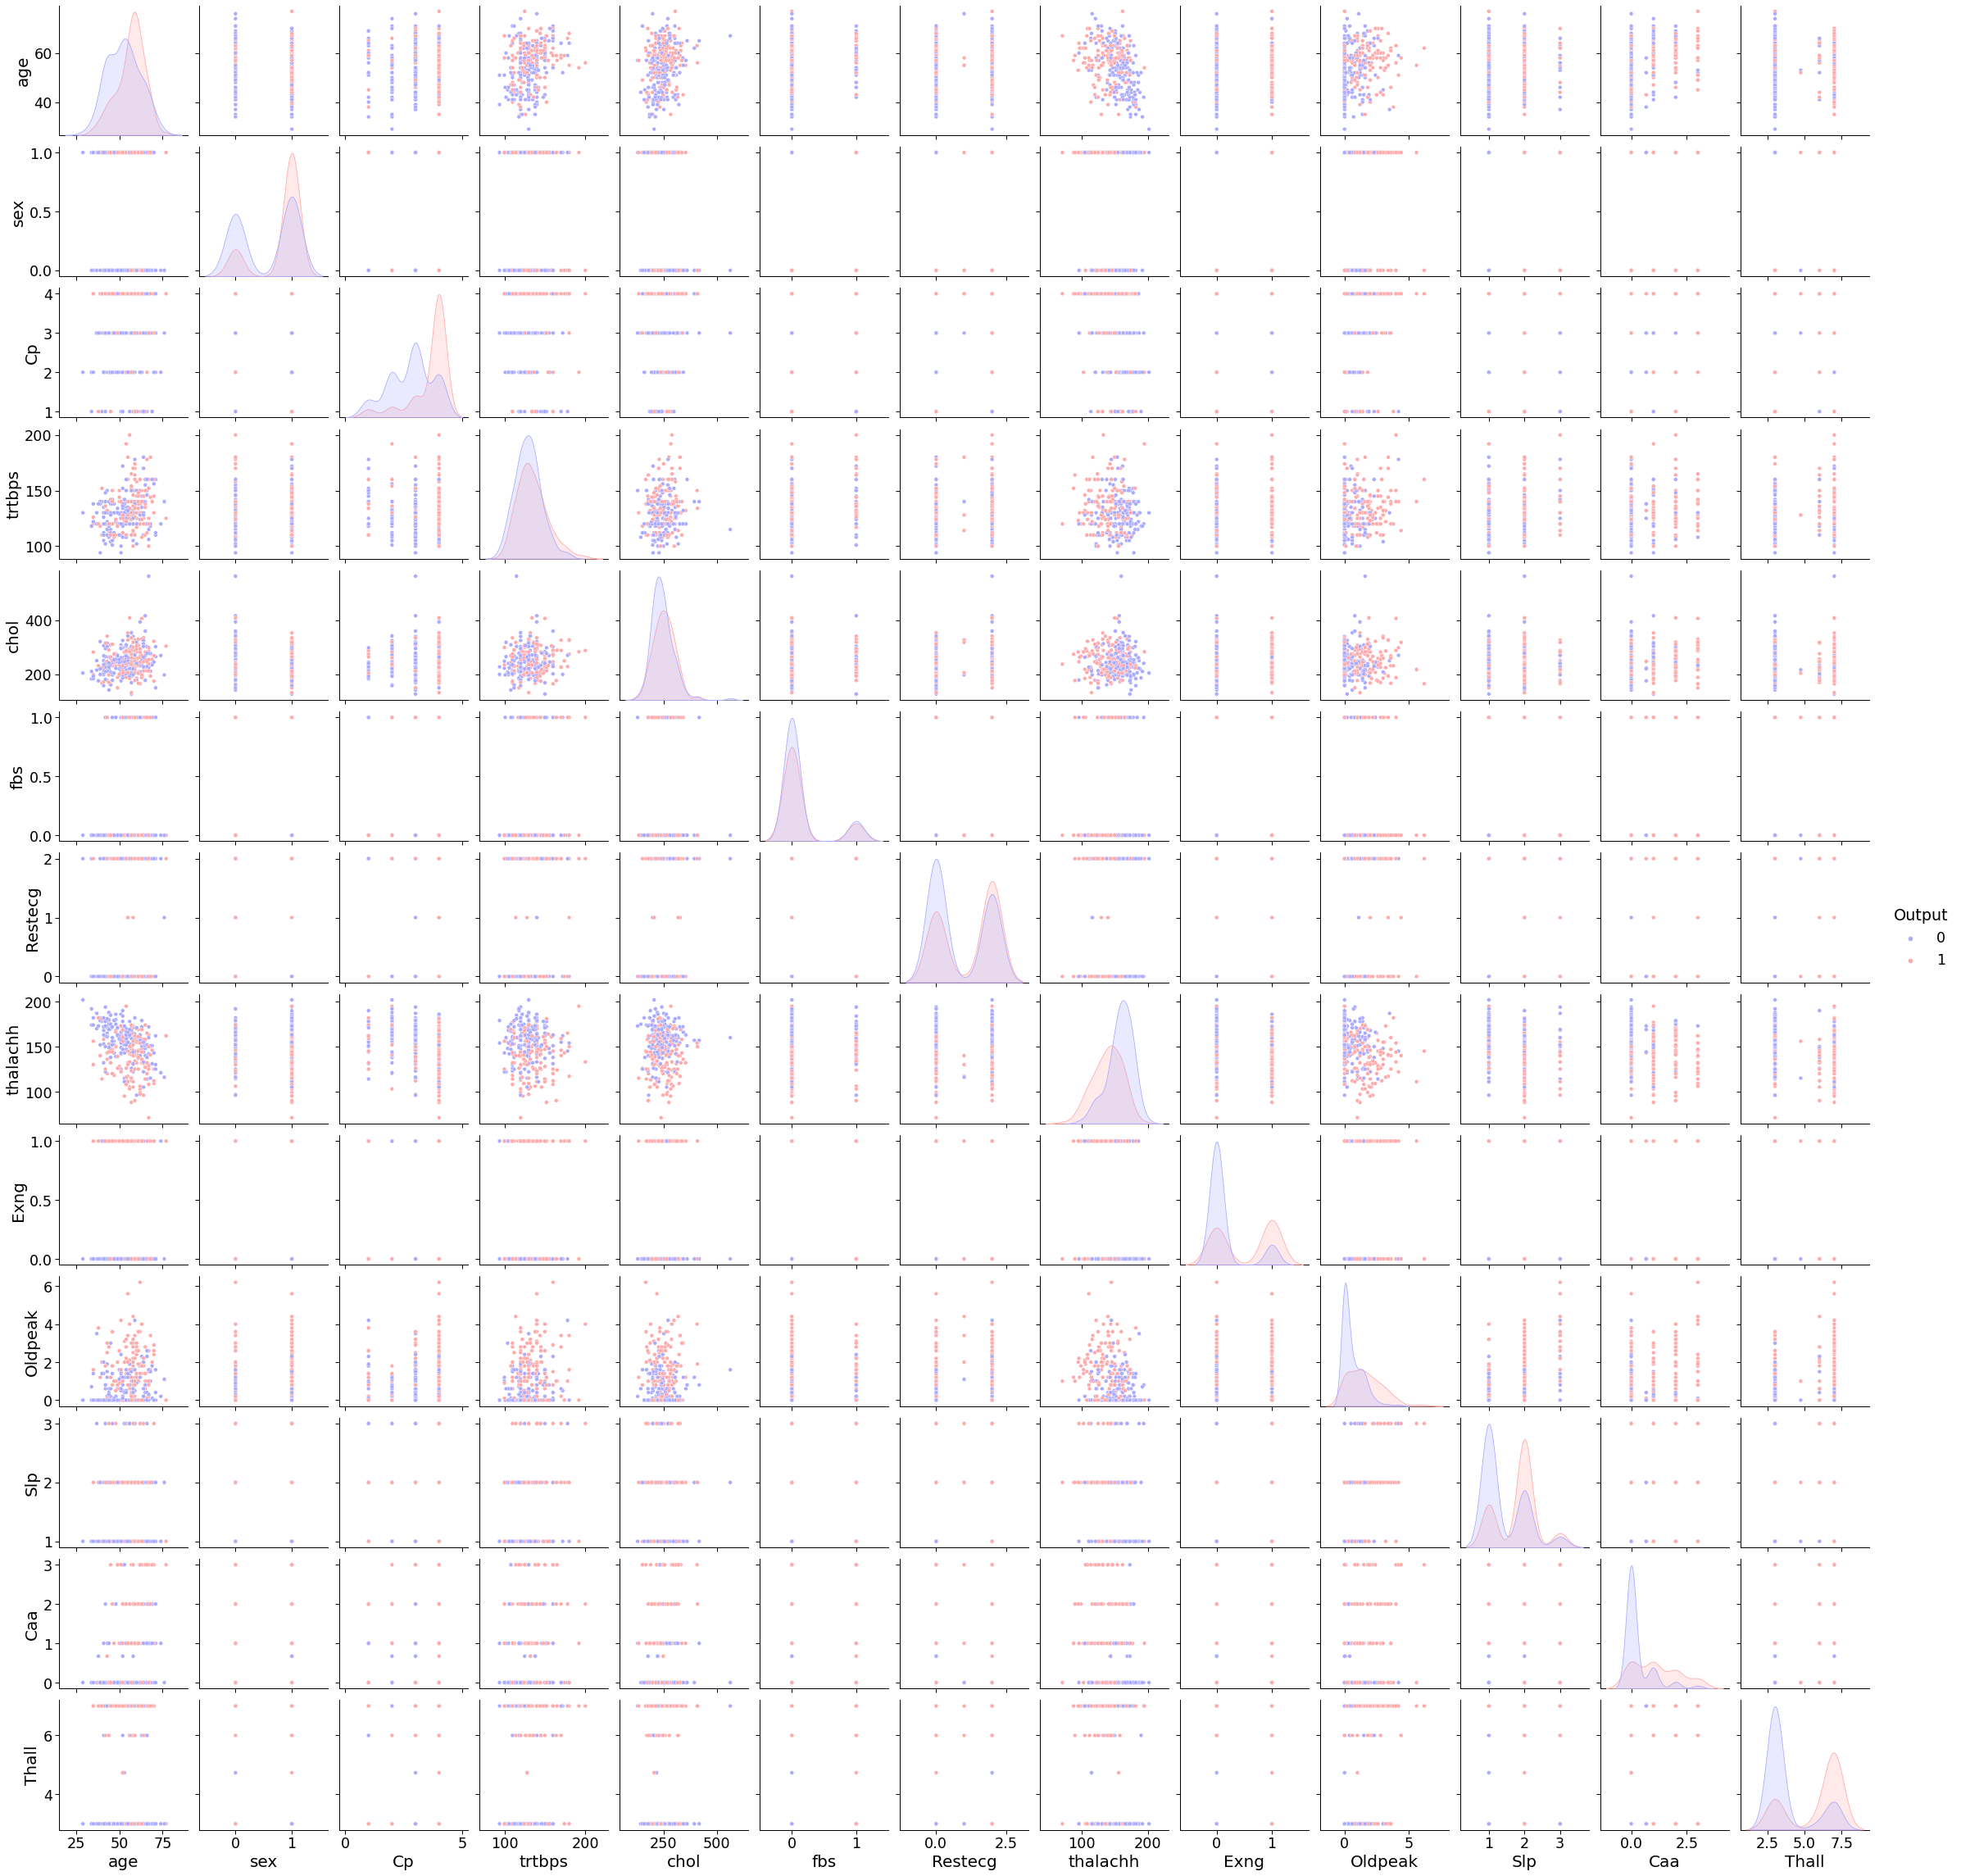

In [30]:
sns.pairplot(df_copy,hue='Output',palette='bwr')

In [31]:
#Correlation between the Output feature with every other feature in the dataset
corr_mat=df_copy.corr()
corr_mat['Output'].sort_values(ascending=False)

Output      1.000000
Thall       0.523928
Caa         0.457598
Exng        0.431894
Oldpeak     0.424510
Cp          0.414446
Slp         0.339213
sex         0.276816
age         0.223120
Restecg     0.169202
trtbps      0.150825
chol        0.085164
fbs         0.025264
thalachh   -0.417167
Name: Output, dtype: float64

<AxesSubplot:title={'center':'Correlation Matrix'}>

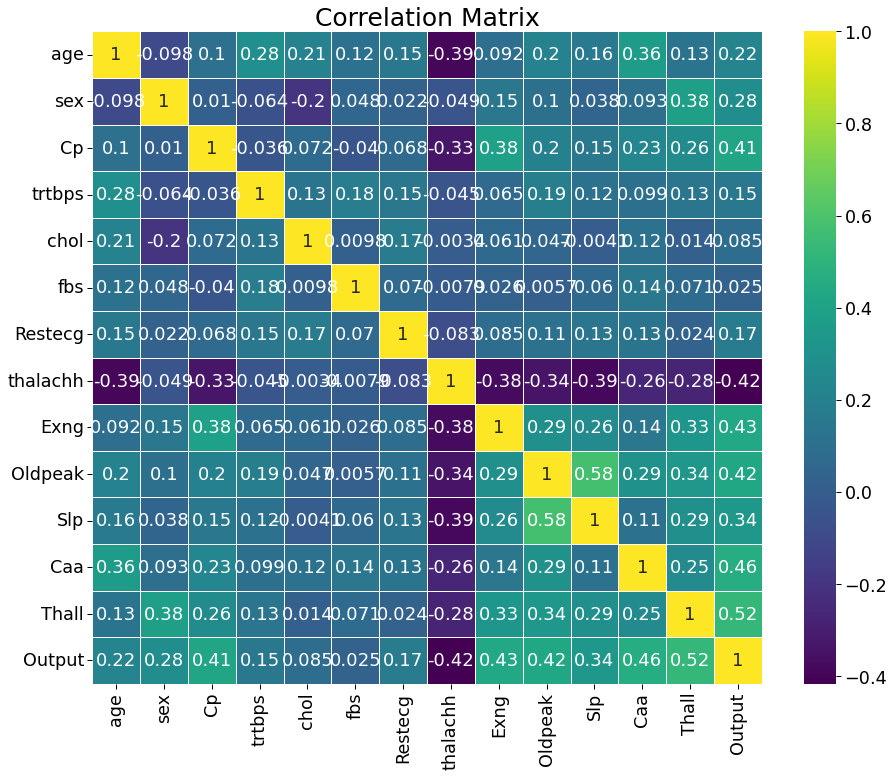

In [32]:
#Heatmap showing the correlation between the attributes
plt.figure(figsize = (15,12))
plt.title('Correlation Matrix')
df_copy.corr()
sns.heatmap(df_copy.corr(),annot=True,cmap='viridis',linewidths=1)

<AxesSubplot:>

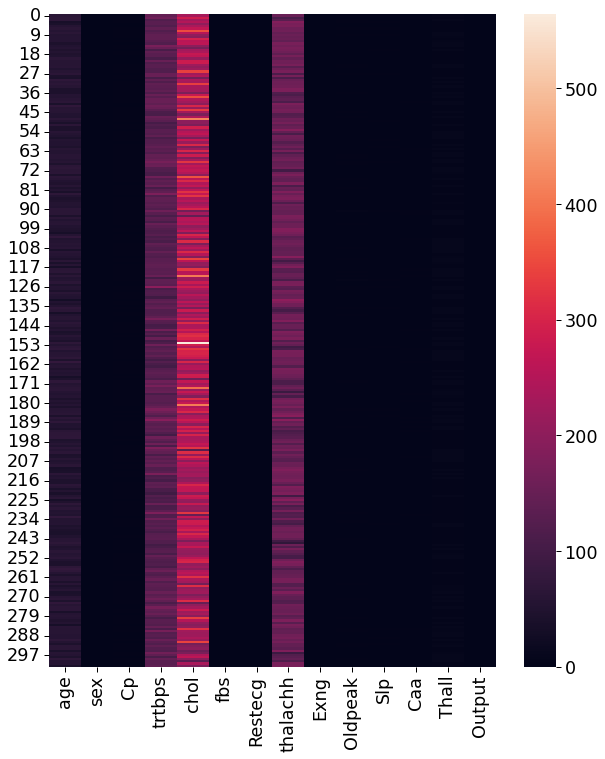

In [33]:
fig,ax=plt.subplots(figsize=(10,12))
sns.heatmap(df_copy)

<AxesSubplot:xlabel='Output', ylabel='count'>

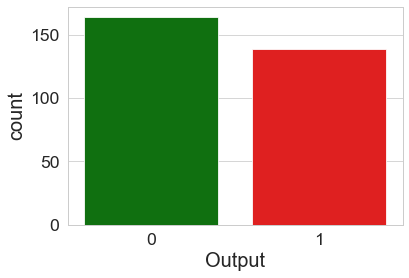

In [34]:
# Countplot showing the distribution of Output feature
# 0: No heart disease, 1: Heart disease present
sns.set_style('whitegrid')
sns.set_palette(["Green","Red"])
sns.countplot(x='Output',data=df_copy)

Output
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

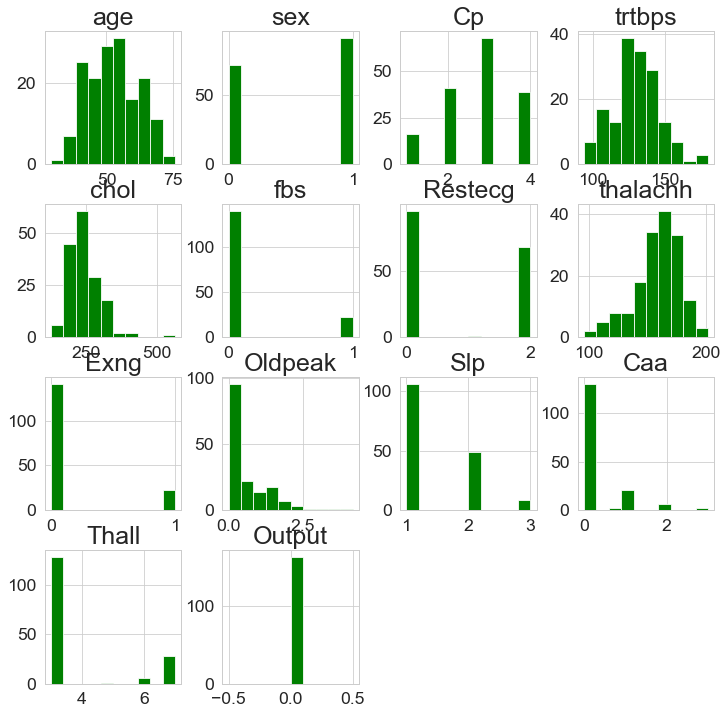

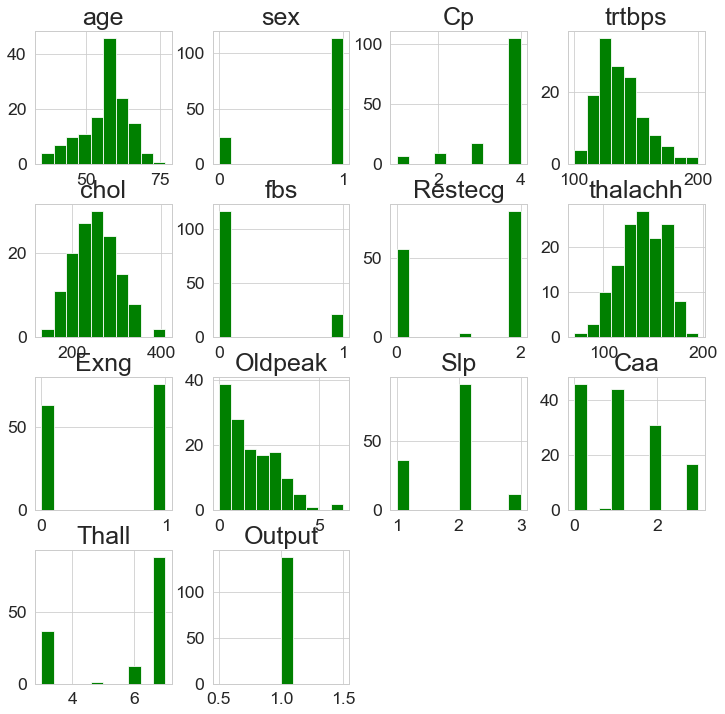

In [35]:
# Histogram of attributes shows the range of dataset attributes
df_copy.groupby('Output').hist(figsize=(12, 12))

# Splitting the data into independent and dependent features

In [36]:
x=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]

In [37]:
x

age  sex   Cp  trtbps   chol  fbs  Restecg  thalachh  Exng  Oldpeak  \
0    63.0    1  1.0   145.0  233.0  1.0      2.0     150.0   0.0      2.3   
1    67.0    1  4.0   160.0  286.0  0.0      2.0     108.0   1.0      1.5   
2    67.0    1  4.0   120.0  229.0  0.0      2.0     129.0   1.0      2.6   
3    37.0    1  3.0   130.0  250.0  0.0      0.0     187.0   0.0      3.5   
4    41.0    0  2.0   130.0  204.0  0.0      2.0     172.0   0.0      1.4   
..    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
298  45.0    1  1.0   110.0  264.0  0.0      0.0     132.0   0.0      1.2   
299  68.0    1  4.0   144.0  193.0  1.0      0.0     141.0   0.0      3.4   
300  57.0    1  4.0   130.0  131.0  0.0      0.0     115.0   1.0      1.2   
301  57.0    0  2.0   130.0  236.0  0.0      2.0     174.0   0.0      0.0   
302  38.0    1  3.0   138.0  175.0  0.0      0.0     173.0   0.0      0.0   

     Slp       Caa  Thall  
0    3.0  0.000000    6.0  
1    2.0  3.000000    3.0  
2    2.0  2.000000    7.0  
3    3.0  0.000000    3.0  
4    1.0  0.000000    3.0  
..   ...       ...    ...  
298  2.0  0.000000    7.0  
299  2.0  2.000000    7.0  
300  2.0  1.000000    7.0  
301  2.0  1.000000    3.0  
302  1.0  0.672241    3.0  

[303 rows x 13 columns]

In [38]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: Output, Length: 303, dtype: int64

# Splitting the dataset into Training and Testing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [40]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      age  sex   Cp  trtbps   chol  fbs  Restecg  thalachh  Exng  Oldpeak  \
74   44.0    1  4.0   110.0  197.0  0.0      2.0     177.0   0.0      0.0   
153  55.0    1  4.0   160.0  289.0  0.0      2.0     145.0   1.0      0.8   
64   54.0    1  4.0   120.0  188.0  0.0      0.0     113.0   0.0      1.4   
296  59.0    1  4.0   164.0  176.0  1.0      2.0      90.0   0.0      1.0   
287  58.0    1  2.0   125.0  220.0  0.0      0.0     144.0   0.0      0.4   
..    ...  ...  ...     ...    ...  ...      ...       ...   ...      ...   
251  58.0    1  4.0   146.0  218.0  0.0      0.0     105.0   0.0      2.0   
192  43.0    1  4.0   132.0  247.0  1.0      2.0     143.0   1.0      0.1   
117  35.0    0  4.0   138.0  183.0  0.0      0.0     182.0   0.0      1.4   
47   50.0    1  4.0   150.0  243.0  0.0      2.0     128.0   0.0      2.6   
172  59.0    0  4.0   174.0  249.0  0.0      0.0     143.0   1.0      0.0   

     Slp       Caa  Thall  
74   1.0  1.000000    3.0  
153  2.0  1.000000 

## Performing Z-score normalization by using StandardScaler module for better accuracy

In [41]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_norm=sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [42]:
print(f"X_train normalised values= {X_train_norm} and \n X_test normalised values ={X_test_norm}")


X_train normalised values= [[-1.13185208  0.67015058  0.86665919 ... -0.98667524  0.32127709
  -0.97888213]
 [ 0.07286213  0.67015058  0.86665919 ...  0.59461885  0.32127709
   1.08790769]
 [-0.03665734  0.67015058  0.86665919 ...  0.59461885  0.32127709
   1.08790769]
 ...
 [-2.11752735 -1.49220195  0.86665919 ... -0.98667524 -0.71560817
  -0.97888213]
 [-0.47473524  0.67015058  0.86665919 ...  0.59461885 -0.71560817
   1.08790769]
 [ 0.51094003 -1.49220195  0.86665919 ...  0.59461885 -0.71560817
  -0.97888213]] and 
 X_test normalised values =[[-2.22704682 -1.49220195 -1.19966124 -0.82197083 -0.69757294 -0.42483856
  -0.98367495  1.91701599 -0.70272837 -0.31431559 -0.98667524 -0.71560817
  -0.97888213]
 [ 1.38709582 -1.49220195 -0.16650103 -0.99330325  6.36621886 -0.42483856
   1.03369232  0.47948604 -0.70272837  0.43631967  0.59461885 -0.71560817
   1.08790769]
 [-0.03665734  0.67015058  0.86665919 -1.27885728 -0.7773898  -0.42483856
   1.03369232 -1.85650013  1.42302495 -0.89814302

# E. <ins>MACHINE LEARNING ALGORITHMS :<ins>

#   I)<ins>Naïve Bayes Algorithm</ins>
### NB is a supervise classification algorithm. It is a simple technique using Bayes theorem. To get the probability, mathematical concept is used with the support of bayes theorem. The correlation is neither related to each other nor predictor to one another. All parameters work autonomously for getting the maximum probability.
<center>
<img src="https://uc-r.github.io/public/images/analytics/naive_bayes/naive_bayes_icon.png" width=600 height=600>
</center>


In [43]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
#Training Naive Bayes Classifier on training data
nb_classifier.fit(X_train_norm, y_train)

GaussianNB()

In [44]:
#Predicted output values on test data
y_pred_nb_test = nb_classifier.predict(X_test_norm)

In [45]:
#Confusion matrix for test data
from sklearn.metrics import confusion_matrix,accuracy_score
nb_cm_test = confusion_matrix(y_pred_nb_test, y_test)
print(nb_cm_test)

[[30  8]
 [ 5 18]]


In [46]:
#Predicted output values on train data
y_pred_nb_train = nb_classifier.predict(X_train_norm)
#Confusion matrix for train data
nb_cm_train = confusion_matrix(y_pred_nb_train, y_train)
print(nb_cm_train)

[[117  20]
 [ 12  93]]


In [47]:
#Printing accuracy score for training set and testing set
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_score(y_train,y_pred_nb_train)))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_score(y_test,y_pred_nb_test)))

Accuracy for training set for Naive Bayes = 0.8677685950413223
Accuracy for test set for Naive Bayes = 0.7868852459016393


Text(85.38000000000001, 0.5, 'Predicted class')

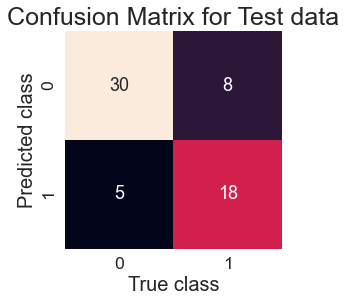

In [48]:
#Confusion matrix for test data
sns.heatmap(nb_cm_test,square=True,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix for Test data")
plt.xlabel("True class")
plt.ylabel("Predicted class")

# II) <ins>Decision Tree Algorithm</ins>
### Decision Tree is an algorithm that classifies parameters in categorical form in spite of arithmetic data. Tree like structure is created by Decision Tree. Many large data set related to medical have analyzed by Decision Tree due to its simple nature. It works on tree node for analysis.
### For the tree construction we use entropy of the data attributes and on the basis of attribute root and other nodes are drawn.
### <center> Entropy= -Σ Pij log Pij </center>
### In the above equation of entropy, Pij is probability of the node and according to it the entropy of each node is calculated. The node which have highest entropy calculation is selected as the root node and this process is repeated until all the nodes of the tree are calculated or until the tree constructed. When the number of nodes are imbalanced then tree creates the over fitting problem which is not good for the calculation

In [49]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#Training Decision tree on training data
dt_classifier.fit(X_train_norm, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
#Predicted output values on test data
y_pred_dt_test=dt_classifier.predict(X_test_norm)

In [51]:
#Confusion matrix for test data
dt_cm_test = confusion_matrix(y_pred_dt_test, y_test)
print(dt_cm_test)


[[27  9]
 [ 8 17]]


In [52]:
#Predicted output values on train data
y_pred_dt_train=dt_classifier.predict(X_train_norm)
#Confusion matrix for train data
dt_cm_train=confusion_matrix(y_pred_dt_train,y_train)
print(dt_cm_train)

[[129   0]
 [  0 113]]


In [53]:
#Printing accuracy score for training set and testing set
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_score(y_train,y_pred_dt_train)))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_score(y_test,y_pred_dt_test)))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7213114754098361


Text(85.38000000000001, 0.5, 'Predicted class')

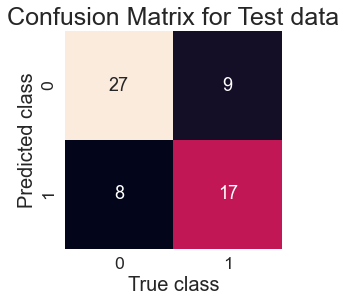

In [54]:
#Confusion matrix for test data
sns.heatmap(dt_cm_test,square=True,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix for Test data")
plt.xlabel("True class")
plt.ylabel("Predicted class")

# III) <ins>Random Forest Algorithm</ins>
### Random Forest  algorithm is supervised primarily based learning. It is used as classifier in numerous fields. By using this more trees makes a forest. If we have more number of trees then it create higher accuracy. It is also used for regression task. but it accomplish well when classify the task. And may overwhelmed misplaced values. There are three approach of Random Forest: 
### Forest RC(Random Blend)
### Forest RI(Random input)
### And combination of RC and RI

Text(0, 0.5, 'Testing Accuracy')

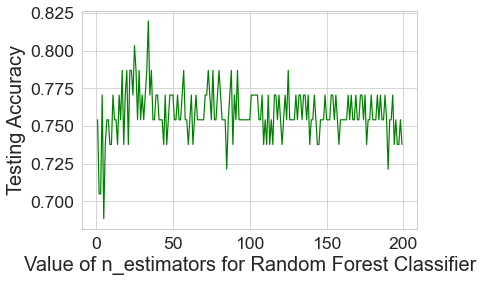

In [55]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# Using Testing Accuracy v/s n_estimators value plot for better n_estimators value
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train_norm, y_train)
    y_pred = rfc.predict(X_test_norm)
    scores.append(accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


Text(0, 0.5, 'Error Rate')

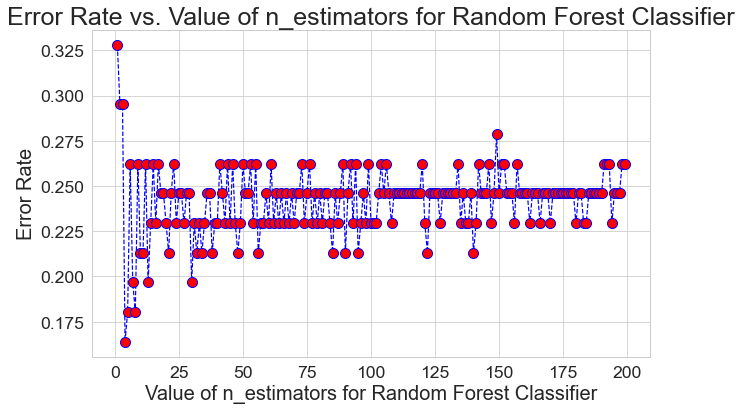

In [56]:
#Using elbow method to pick a good n_estimator value
error_rate = []
for i in range(1,200):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train_norm, y_train)
    pred_i = rfc.predict(X_test_norm)
    error_rate.append(np.mean(pred_i != y_test))
#Plot the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Value of n_estimators for Random Forest Classifier')
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Error Rate')

In [57]:
#Using n_estimators = 45 from above
rf_classifier = RandomForestClassifier(n_estimators = 45)
#Training Random Forest on training data
rf_classifier.fit(X_train_norm, y_train)

RandomForestClassifier(n_estimators=45)

In [58]:
#Predicted output values on test data
y_pred_rf_test=rf_classifier.predict(X_test_norm)

In [59]:
#Confusion matrix for test data
rf_cm_test = confusion_matrix(y_pred_rf_test, y_test)
print(rf_cm_test)

[[29 10]
 [ 6 16]]


In [60]:
#Predicted output values on train data
y_pred_rf_train=rf_classifier.predict(X_train_norm)
#Confusion matrix for train data
rf_cm_train=confusion_matrix(y_pred_rf_train,y_train)
print(rf_cm_train)

[[129   0]
 [  0 113]]


In [61]:
#Printing accuracy score for training set and testing set
print('Accuracy for training set for Random Forest = {}'.format(accuracy_score(y_train,y_pred_rf_train)))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_score(y_test,y_pred_rf_test)))

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.7377049180327869


Text(85.38000000000001, 0.5, 'Predicted class')

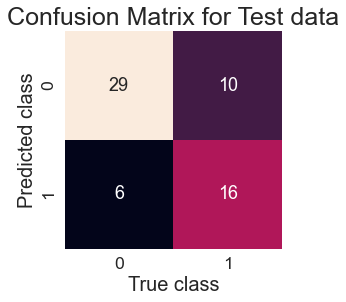

In [62]:
#Confusion matrix for test data
sns.heatmap(rf_cm_test,square=True,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix for Test data")
plt.xlabel("True class")
plt.ylabel("Predicted class")

# IV) <ins>Logistic Regression Algorithm</ins>
### Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds.
<center>
<img src="https://www.saedsayad.com/images/LogReg_1.png" width=600 height=600>
</center>

In [63]:
#Logistic Regresssion
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
#Training Logistic Regression on training data
lr_classifier.fit(X_train_norm, y_train)


LogisticRegression(random_state=0)

In [64]:
#Predicted output values on test data
y_pred_lr_test=lr_classifier.predict(X_test_norm)

In [65]:
#Confusion matrix for test data
lr_cm_test=confusion_matrix(y_pred_lr_test,y_test)
print(lr_cm_test)

[[31  9]
 [ 4 17]]


In [66]:
#Predicted output values on train data
y_pred_lr_train=lr_classifier.predict(X_train_norm)

In [67]:
#Confusion matrix for train data
lr_cm_train=confusion_matrix(y_pred_lr_train,y_train)
print(lr_cm_train)

[[117  21]
 [ 12  92]]


In [68]:
#Printing accuracy score for training set and testing set
print('Accuracy for training set for Logistic Regression = {}'.format(accuracy_score(y_train,y_pred_lr_train)))
print('Accuracy for test set for Logistic Regression = {}'.format(accuracy_score(y_test,y_pred_lr_test)))

Accuracy for training set for Logistic Regression = 0.8636363636363636
Accuracy for test set for Logistic Regression = 0.7868852459016393


Text(85.38000000000001, 0.5, 'Predicted class')

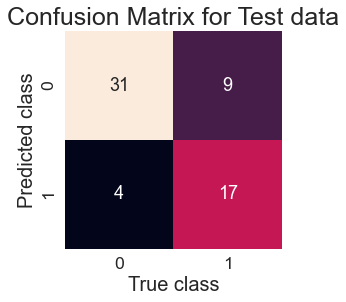

In [69]:
#Confusion matrix for test data
sns.heatmap(lr_cm_test,square=True,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix for Test data")
plt.xlabel("True class")
plt.ylabel("Predicted class")

# V) <ins>Support Vector Machine (SVM) Algorithm</ins>
### Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

### The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

### SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:
<center>
    <img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" width=400 height=400>
</center>

In [70]:
#SVM
from sklearn.svm import SVC
sv_classifier = SVC(kernel = 'rbf')
#Training SVM on training data
sv_classifier.fit(X_train_norm, y_train)

SVC()

In [71]:
#Predicted output values on test data
y_pred_sv_test=sv_classifier.predict(X_test_norm)
#Confusion matrix for test data
sv_cm_test=confusion_matrix(y_pred_sv_test,y_test)
print(sv_cm_test)

[[32  9]
 [ 3 17]]


In [72]:
#Predicted output values on train data
y_pred_sv_train=sv_classifier.predict(X_train_norm)

In [73]:
#Confusion matrix for train data
sv_cm_train=confusion_matrix(y_pred_sv_train,y_train)
print(sv_cm_train)

[[124  13]
 [  5 100]]


In [74]:
#Printing accuracy score for training set and testing set
print('Accuracy for training set for SVM = {}'.format(accuracy_score(y_train,y_pred_sv_train)))
print('Accuracy for test set for SVM = {}'.format(accuracy_score(y_test,y_pred_sv_test)))

Accuracy for training set for SVM = 0.9256198347107438
Accuracy for test set for SVM = 0.8032786885245902


Text(85.38000000000001, 0.5, 'Predicted class')

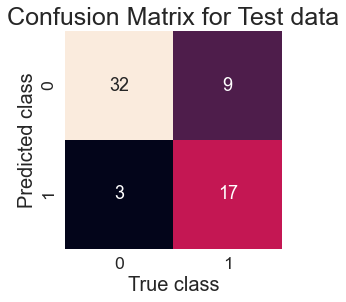

In [75]:
#Confusion matrix for test data
sns.heatmap(sv_cm_test,square=True,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix for Test data")
plt.xlabel("True class")
plt.ylabel("Predicted class")

# VI) <ins>K-Nearest Neighbor (KNN) Algorithm</ins>
### K-Nearest Neighbors is the supervised machine learning algorithm used for classification and regression. It manipulates the training data and classifies the new test data based on distance metrics. It finds the k-nearest neighbors to the test data, and then classification is performed by the majority of class labels. It work on the basis of distance between the location of data and on the basis of this distinct data are classified with each other. All the other group of data are called neighbor of each other and number of neighbor are decided by the user which play very crucial role in analysis of the dataset. 
<center>
    <img src="https://miro.medium.com/max/739/0*elaSSkBa3Gi9H1-x.png" width=600 height=600>
</center>
    

### Choosing the value of k:
### ● The algorithm's performance can be sensitive to the value of k. When k is small, the model is sensitive to noise and is prone to overfitting whereas large values of k can lead to underfitting, especially if there is class imbalance.
### ● When the number of classes is 2, k should be an odd number to prevent any 'tied votes' when making predictions.
### ● The value of k should be bigger than the number of classes for similar reasons.

Text(0, 0.5, 'Error Rate')

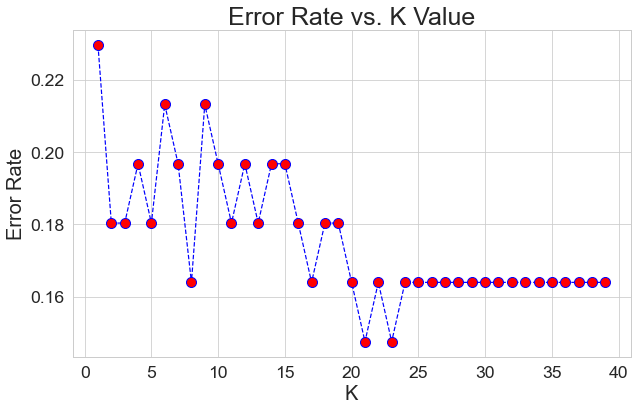

In [76]:
#KNN
#Using elbow method to pick a good K Value
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm,y_train)
    pred_i = knn.predict(X_test_norm)
    error_rate.append(np.mean(pred_i != y_test))
#Plot the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
# Using k value v/s accuracy rate plot for better k value
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

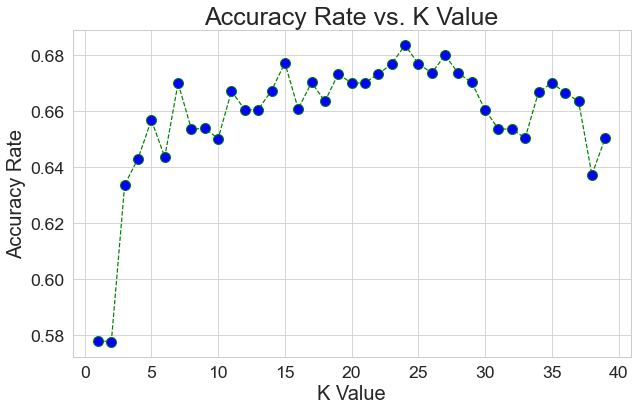

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

In [79]:
#Using k = 21 from above
knn_classifier = KNeighborsClassifier(n_neighbors = 21, metric = 'minkowski', p = 2)
#Training SVM on training data
knn_classifier.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=21)

In [80]:
#Predicted output values on test data
y_pred_knn_test=knn_classifier.predict(X_test_norm)
#Confusion matrix for test data
knn_cm_test=confusion_matrix(y_pred_knn_test,y_test)
print(knn_cm_test)

[[34  8]
 [ 1 18]]


In [81]:
#Predicted output values on train data
y_pred_knn_train=knn_classifier.predict(X_train_norm)

In [82]:
#Confusion matrix for train data
knn_cm_train=confusion_matrix(y_pred_knn_train,y_train)
print(knn_cm_train)

[[118  25]
 [ 11  88]]


In [83]:
#Printing accuracy score for training set and testing set
print('Accuracy for training set for KNN = {}'.format(accuracy_score(y_train,y_pred_knn_train)))
print('Accuracy for test set for KNN = {}'.format(accuracy_score(y_test,y_pred_knn_test)))

Accuracy for training set for KNN = 0.8512396694214877
Accuracy for test set for KNN = 0.8524590163934426


Text(85.38000000000001, 0.5, 'Predicted class')

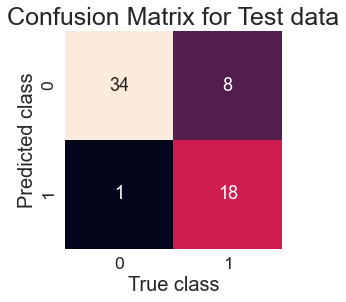

In [84]:
#Confusion matrix for test data
sns.heatmap(knn_cm_test,square=True,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix for Test data")
plt.xlabel("True class")
plt.ylabel("Predicted class")

# KNN as the final model for predicting new input values
### Accuracy for KNN Algorithm: 85.24%

In [85]:
#predicting input value on KNN algorithm as KNN gave highest accuracy
input_data = ([[45, 0, 3, 149, 233, 1, 1, 169, 0, 1.3,3,3,6]])
prediction = knn_classifier.predict(sc.transform(input_data))
print(prediction)
if (prediction[0]== 0):
 print('The Person does not have Heart Disease')
else:
 print('The Person has Heart Disease')

[1]
The Person has Heart Disease
